Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')
(150, 5)
       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
accuracy score:  0.9333333333333333


Accuracy score using Entropy:  0.9333333333333333


CONFUSION MATRIX:
 [[10  0  0]
 [ 0 11  2]
 [ 0  0  7]]


INFORMATION GAIN OF ATTRIBUTES:
sepal.length 0.9120742200804274
sepal.width 0.5249541189896382
petal.length 1.021935448947238
petal.width 1.068145260984568


INFORMATION GAIN RATIO:
0    0.2176

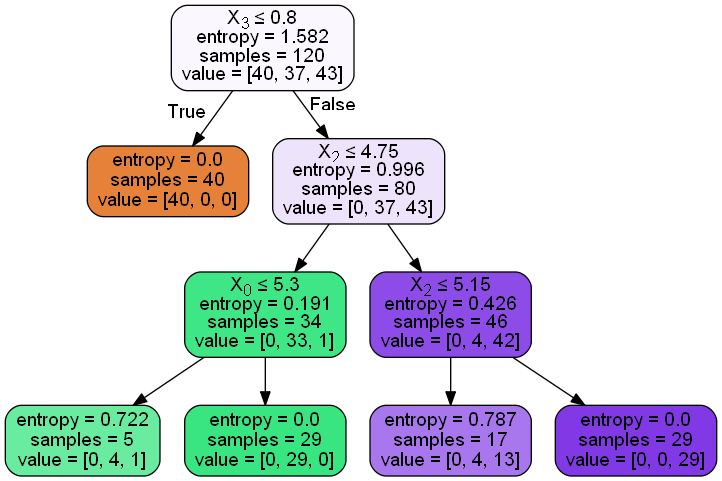

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn import metrics 
from sklearn import tree
from IPython.display import SVG
from IPython.display import display
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree.export import export_text
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus




# entropy of each attribute:  entropy= -sum of(p[i]*log(p[i])])
def _entropy(data, column_name):
    elements,counts = np.unique(data[column_name],return_counts = True)
    _entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return(_entropy)


#Reading the iris dataset
iris= pd.read_csv(r'C:\Users\Admin\.jupyter\iris dataset.csv',header=0)
print(iris.columns)
print(iris.shape)
sns.set(style="white") 

y= list(iris['variety'])
x= iris.drop('variety',axis=1)
print(iris.describe())
#sns.pairplot(iris, hue='variety')  # plotting the three classes together to analyse the difference
# the setosa variety is highly uncorrelated from the other two varieties
#histo = iris.hist(bins = 4, figsize = (6, 6))
#plt.show()
#splitting the data into training and testing part
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
x_train.head()
species= pd.DataFrame(columns=['setosa','verginica','versicolor'])

#Building a model and creating functions
#a) model using gini index
model = DecisionTreeClassifier(criterion="gini",random_state=50, max_depth=3,min_samples_leaf=5)
model.fit(x_train, y_train)
y_predict= model.predict(x_test)
print("accuracy score: ",accuracy_score(y_test, y_predict))
print("\n")

#b) model using entropy
model_entropy= DecisionTreeClassifier(criterion="entropy",random_state=50, max_depth=3,min_samples_leaf=5)
model_entropy.fit(x_train,y_train)
y_predict= model_entropy.predict(x_test)
print("Accuracy score using Entropy: ",accuracy_score(y_test, y_predict))
print("\n")

#c)confusion matrix
print("CONFUSION MATRIX:\n",confusion_matrix(y_test, y_predict))
print("\n")

#d) Information gain
print('INFORMATION GAIN OF ATTRIBUTES:')
IG =  mutual_info_classif(x_test, y_test, discrete_features=True) #using the mutual_info to calculate information gain of each attribute
for i in range(len(x.columns)):
    print(x.columns[i],IG[i])
 
a= pd.Series({"sepal.length":_entropy(x_test,'sepal.length'),
              "sepal.width":_entropy(x_test,'sepal.width'), 
              "petal.length":_entropy(x_test,'petal.length'),
              "petal.width":_entropy(x_test,'petal.width')})
print("\n")
#e) Information gain ratio:       
print('INFORMATION GAIN RATIO:')
gain_ratio= pd.Series([])
for i in range(len(a)):
   gain_ratio[i]= IG[i]/a[i]       #gain ratio=Information gain/split_info  
                                   #split_info is almost equal to entropy
print(gain_ratio)  

#g) Building a tree
dot_data = StringIO()
export_graphviz(model_entropy, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


